In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

import os
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
telecom_cust = pd.read_csv('dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Converting Total Charges to a numerical data type.
telecom_cust["TotalCharges"] = pd.to_numeric(telecom_cust["TotalCharges"], errors='coerce')

# Remove if total charges is 0 (new client with one year or two years contract only)
telecom_cust = telecom_cust[~telecom_cust["TotalCharges"].isnull()]

# Remove Customer ID Column (first column)
df = telecom_cust.iloc[:,1:]

In [6]:
#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [7]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

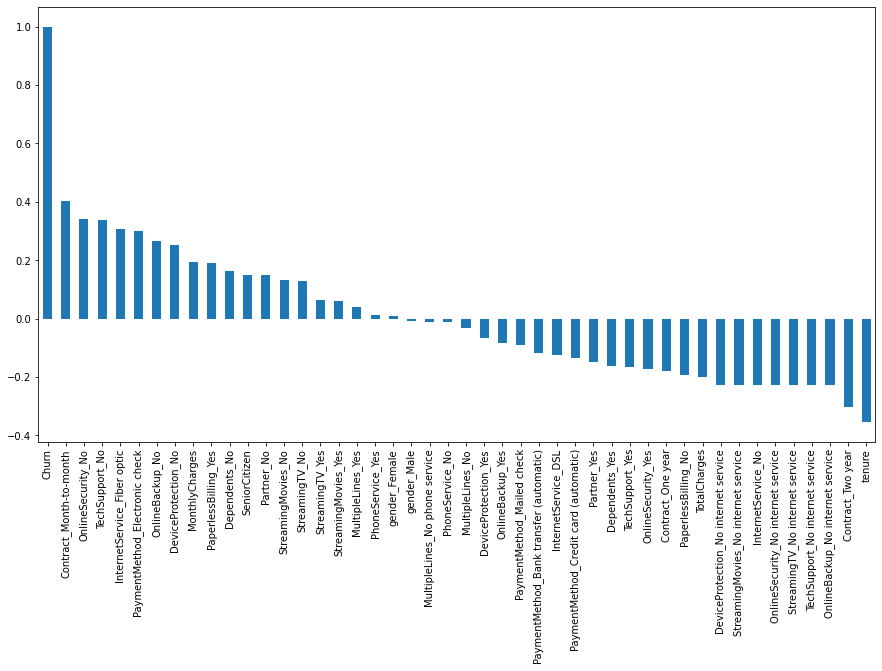

In [8]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

## Data Exploration
Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

#### Gender distribution

Text(0.5, 1.0, 'Gender Distribution')

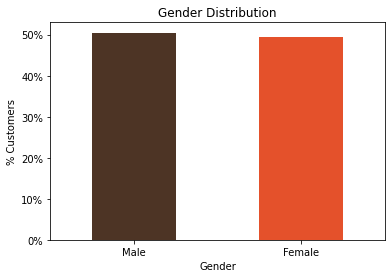

In [9]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

Text(0.5, 1.0, '% of Senior Citizens')

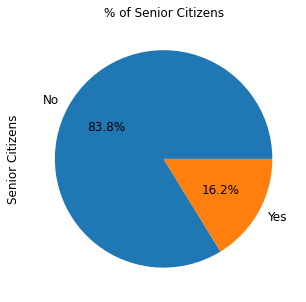

In [10]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

% Senior Citizens - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

In [11]:
df = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df_temp = df.groupby(['variable','value']).count().unstack()
df_temp = df_temp*100/len(telecom_cust)

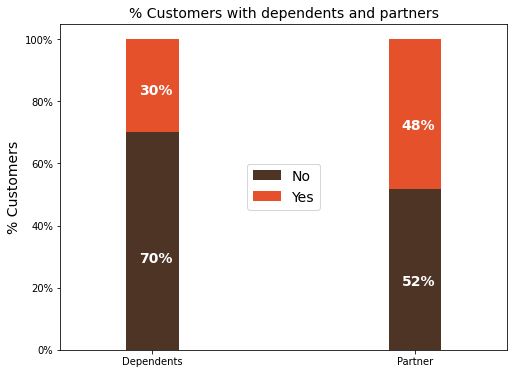

In [12]:
#graph
ax = df_temp.loc[:,'customerID'].plot.bar(stacked=True, color=['#4D3425','#E4512B'],
                                      figsize=(8,6), rot = 0, width = 0.2)
#graph layout, etc...
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

###### Partner status refers to whether a customer has a significant other who is also using the service.
###### Dependent status refers to whether a customer has dependents who are also using the service.

In [13]:
telecom_cust.groupby(['Partner','Dependents']).size().unstack()

Dependents,No,Yes
Partner,,
No,3280,359
Yes,1653,1740


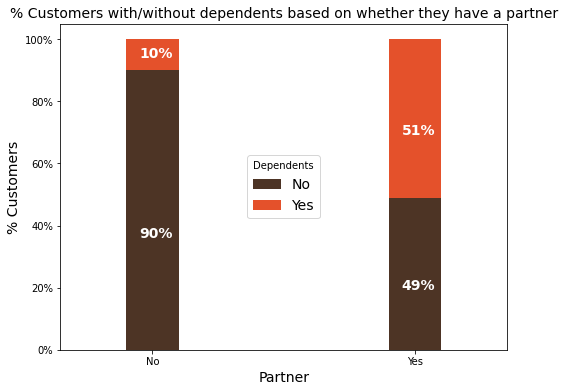

In [14]:
df_temp = telecom_cust.groupby(['Partner','Dependents']).size().unstack()
ax = (df_temp.T*100.0 / df_temp.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = ['#4D3425','#E4512B'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Interestingly, among the customers who have a partner, only about half of them also have a dependent, while other half do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (80%) of them do not have any dependents .

#### Customer Account Information: Let us now look at the tenure, contract

###### "tenure" refers to the length of time that a client has been doing business with a company
###### "contract" refers to the agreement between the company and the client regarding the duration of their business relationship

Text(0.5, 1.0, '# of Customers by their tenure')

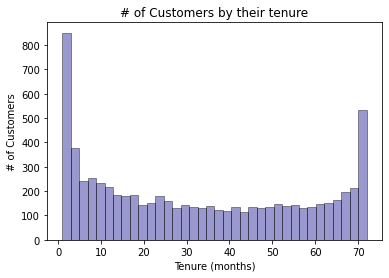

In [15]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

 After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

Text(0.5, 1.0, '# of Customers by Contract Type')

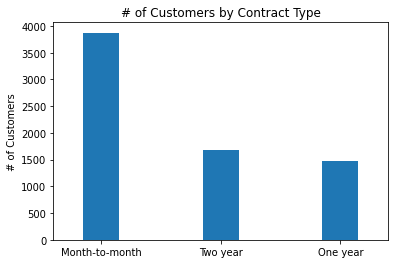

In [16]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

To understand the above graph, lets first look at the # of customers by different contracts.<br>
As we can see from this graph most of the customers are in the month to month contract, 
while there are equal number of customers in the 1 year and 2 year contracts.

Text(0.5, 1.0, 'Two Year Contract')

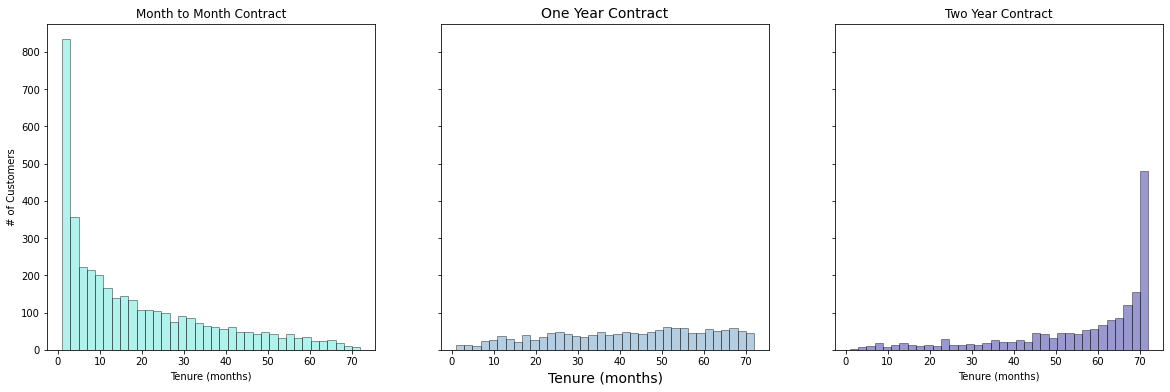

In [17]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)
ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

This is also what we saw in the earlier chart on correlation with the churn rate.

#### Let us now look at the distribution of various services used by customers

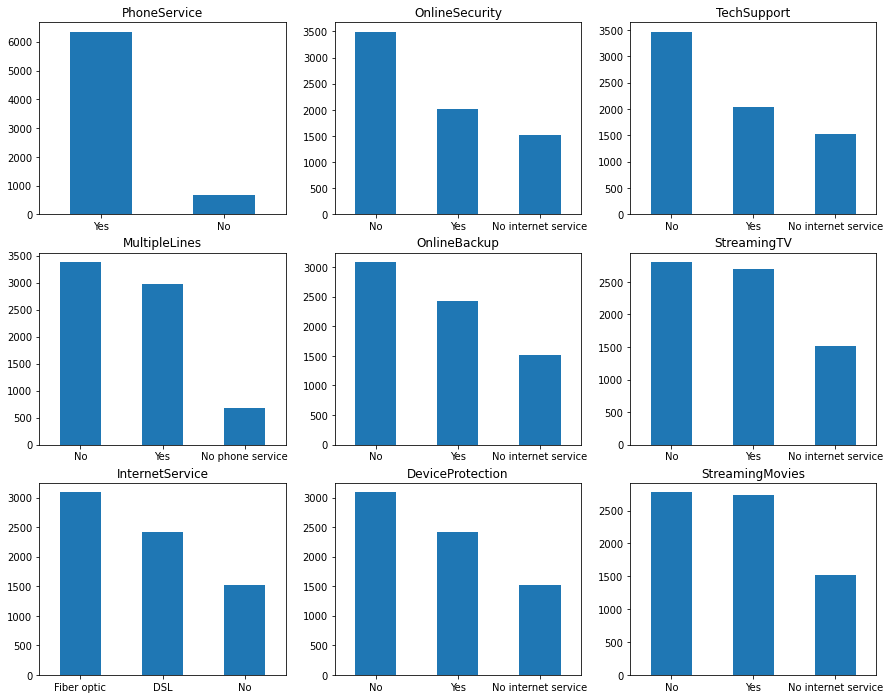

In [18]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

 #### Now let's take a quick look at the relation between monthly and total charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

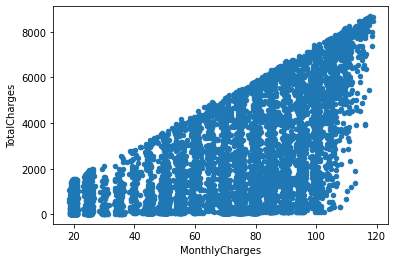

In [19]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

#### Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot

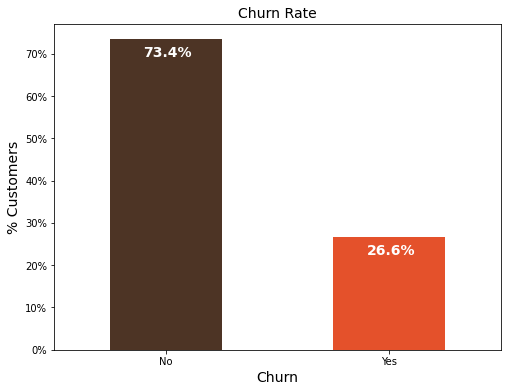

In [20]:
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = ['#4D3425','#E4512B'],
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            color='white',
            weight = 'bold',
            size = 14)

In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.<br><br>
#### Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

##### <strong>Churn vs Tenure:</strong>

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

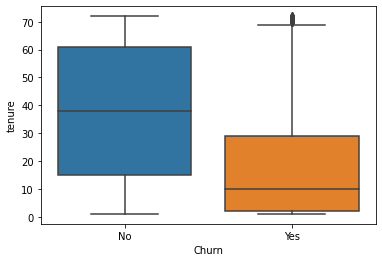

In [21]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

##### <strong>Churn by Contract Type:</strong>

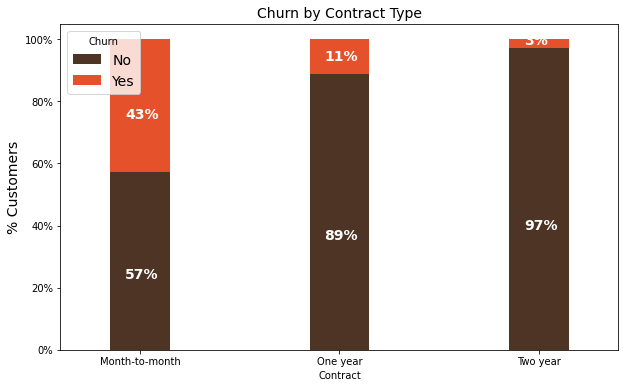

In [22]:
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = ['#4D3425','#E4512B'])

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

##### <strong>Churn by Seniority:</strong>

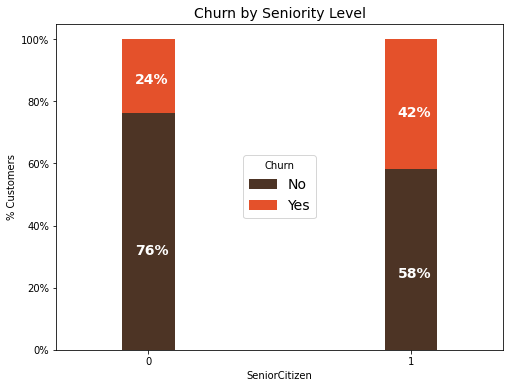

In [23]:
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = ['#4D3425','#E4512B'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Senior Citizens have almost double the churn rate than younger population.

##### <strong>Churn by Monthly Charges:</strong>

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

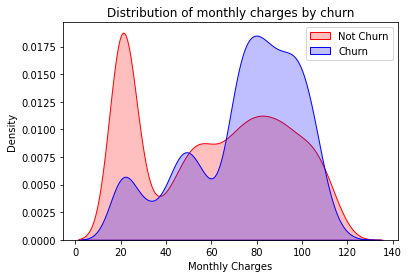

In [24]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Higher % of customers churn when the monthly charges are high.<br>
A KDE (Kernel Density Estimate) plot is a type of data visualization in statistics that shows the distribution of a variable in a dataset.

##### <strong>Churn by Total Charges:</strong>

Text(0.5, 1.0, 'Distribution of total charges by churn')

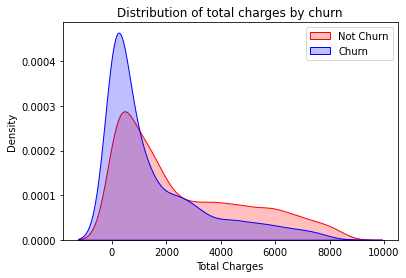

In [25]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

It seems that there is higer churn when the total charges are lower.

## After going through the above EDA we will develop some predictive models and compare them.

We will develop Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost

##### 1. Logistic Regression

In [26]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])
y_unscaled = df_dummies['Churn'].values
X_unscaled = df_dummies.drop(columns = ['Churn'])
# Scaling all the variables to a range of 0 to 1
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [27]:
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_unscaled, y_unscaled, test_size=0.2, random_state=101)

###### SMOTE ?TODO RE

In [28]:
pd.DataFrame(y_train).value_counts() * 100 / 5625

0    73.084444
1    26.915556
dtype: float64

UNBALANCED AF

In [49]:
#smote = SMOTE(random_state=42)
#X_train, y_train = smote.fit_resample(X_train, y_train)

In [30]:
pd.DataFrame(y_train).value_counts() * 100 / 5625

0    73.084444
1    73.084444
dtype: float64

###### Model

In [31]:
# Running logistic regression model
lr_model = LogisticRegression()
lr_model_unscaled = LogisticRegression()
result = lr_model.fit(X_train, y_train)
result_unscaled = lr_model_unscaled.fit(X_train_u, y_train_u)

In [32]:
# Print the prediction accuracy
print ("Logistic Regression with MinMaxScaler(0, 1) --- ", accuracy_score(y_test, lr_model.predict(X_test)))
print ("Logistic Regression with Unscaled Values --- ", accuracy_score(y_test_u, lr_model_unscaled.predict(X_test_u)))

Logistic Regression with MinMaxScaler(0, 1) ---  0.7512437810945274
Logistic Regression with Unscaled Values ---  0.8081023454157783


###### Confusion Matrix

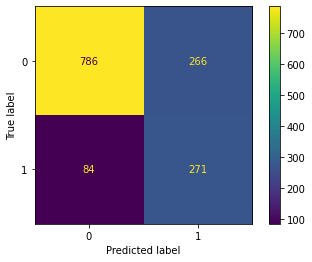

In [33]:
cm = confusion_matrix(y_test,lr_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


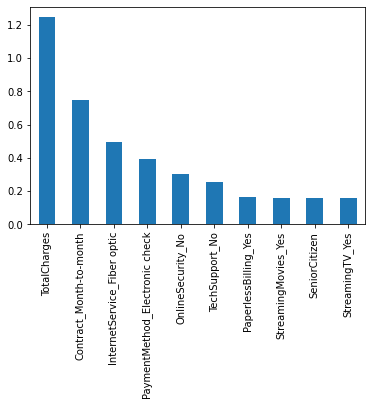

In [34]:
# To get the weights of all the variables
weights = pd.Series(lr_model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


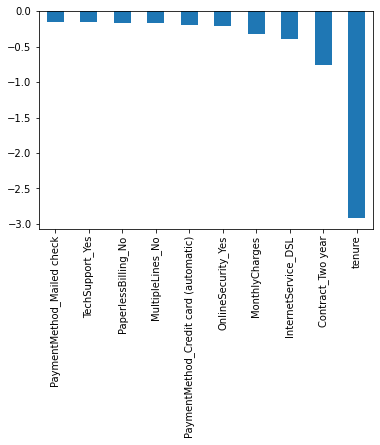

In [35]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

###### Observations
We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
Having DSL internet service also reduces the proability of Churn
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening.
Any hypothesis on the above would be really helpful!

##### 2. Random Forest

###### Model

In [36]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
preds = model_rf.predict(X_test)
print (accuracy_score(y_test, preds))

0.7619047619047619


###### Confusion Matrix

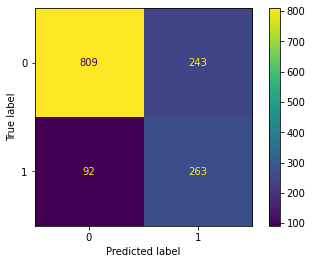

In [37]:
# Create the Confusion matrix
cm = confusion_matrix(y_test,preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()
plt.show()

<AxesSubplot:>

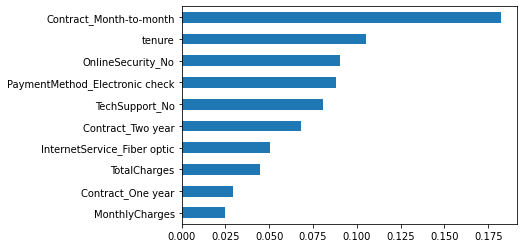

In [38]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

###### Observations:

From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

##### 3. Support Vecor Machine (SVM)

###### Model

In [39]:
svc_model = SVC(kernel='linear') 
svc_model.fit(X_train,y_train)
preds = svc_model.predict(X_test)
accuracy_score(y_test, preds)

0.7221037668798863

###### Confusion Matrix

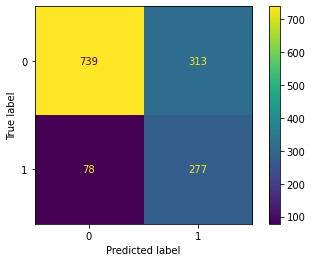

In [40]:
# Create the Confusion matrix
cm = confusion_matrix(y_test,preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()
plt.show()

Wth SVM I was able to increase the accuracy to upto 82%. 
However, we need to take a deeper look at the true positive and true negative rates, including the Area Under the Curve (AUC) for a better prediction. 

##### 4. ADA Boost

###### Model

In [41]:
# AdaBoost Algorithm
adaB_model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
adaB_model.fit(X_train,y_train)
preds = adaB_model.predict(X_test)
accuracy_score(y_test, preds)

0.7690120824449183

###### Confusion Matrix

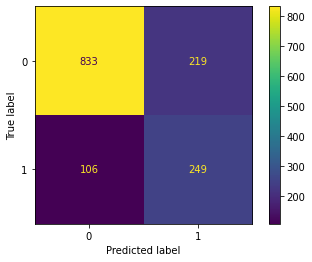

In [42]:
cm = confusion_matrix(y_test,preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()
plt.show()

##### 5. XG Boost

###### Model

In [43]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)
accuracy_score(y_test, preds)

0.7860696517412935

###### Confusion Matrix

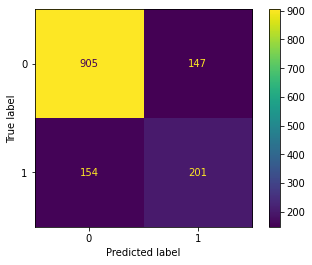

In [44]:
cm = confusion_matrix(y_test,preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()
plt.show()

Interestingly with SVC I was able to increase the accuracy on test data to 82%. Clearly, SVC is a winner among all other techniques.
<br><br>---------------------------------------------------------------------------------------------------------------------<br><br>
SVC works by finding a hyperplane in a high-dimensional space that maximally separates different classes of data points. In other words, it tries to find the best boundary between different classes of data by maximizing the margin or distance between the boundary and the closest data points from each class.

Ada BOOST combines multiple weak classifiers to create a strong classifier.

In AdaBoost, each weak classifier is trained on a weighted subset of the training data, with misclassified data being given more weight in subsequent iterations. This allows the algorithm to focus more on difficult-to-classify data points in subsequent iterations.

The final classifier is a weighted combination of the weak classifiers, with the weights assigned based on their performance on the training data. The output of the final classifier is a weighted sum of the predictions of the weak classifiers.

##### Voting Classifier

In [45]:
# create the voting classifier
voting_clf = VotingClassifier(estimators=[('lr', lr_model), ('rf', model_rf), ('svm', svc_model), ('ada', adaB_model), ('xgb', xgb_model) ], voting='hard')

# train the voting classifier on the training data
voting_clf.fit(X_train, y_train)
pass

###### Confusion Matrix

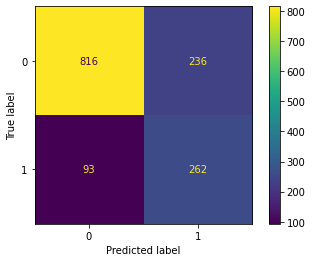

In [46]:
cm = confusion_matrix(y_test,voting_clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()
plt.show()

In [47]:
# calculate the accuracy of the voting classifier on the normal test dataset
test_accuracy = accuracy_score(y_test, voting_clf.predict(X_test))
print("Accuracy:", test_accuracy)

# calculate the accuracy of the voting classifier on the train dataset
train_accuracy = accuracy_score(y_train, voting_clf.predict(X_train))
print("Train Set Accuracy:", train_accuracy)

Accuracy: 0.7661691542288557
Train Set Accuracy: 0.8259547555339334


We can see that our model is generalizing well since the train set prediction is almost the same as test set prediction

In [48]:
print("X_test variance : ", voting_clf.predict(X_test).var())
print("X_train variance : ", voting_clf.predict(X_train).var())

X_test variance :  0.22866780929346567
X_train variance :  0.24757364076102467


variance = sum((x - mean)^2) / (n - 1)<br>
where x is each data point, mean is the mean of the data, and n is the number of data points.

### Hard vs Soft Voting
Hard Voting:
In hard voting, the final prediction is based on the most frequent class predicted by the base classifiers. This means that each base classifier casts a "vote" for a class, and the majority vote is selected as the final prediction. Hard voting is suitable for binary classification problems and multi-class classification problems with an odd number of classes.
<br><br>
Soft Voting:
In soft voting, the final prediction is based on the class probabilities predicted by the base classifiers, which are averaged and the class with the highest average probability is chosen as the final prediction. Soft voting is suitable for multi-class classification problems.